In [ ]:
import pandas as pd
import numpy as np
import collections
import re

In [ ]:
f=open("/content/t1.txt")
doc1=f.read()
f.close()

In [ ]:
doc1

'Ram raced to the grocery store. Ram went inside but realized he forgot his wallet. Ram raced back home to grab it. Once Ram found it, Ram raced to the car again and drove back to the grocery store.'

In [ ]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()

In [ ]:

l_doc1

['ram',
 'raced',
 'to',
 'the',
 'grocery',
 'store',
 'ram',
 'went',
 'inside',
 'but',
 'realized',
 'he',
 'forgot',
 'his',
 'wallet',
 'ram',
 'raced',
 'back',
 'home',
 'to',
 'grab',
 'it',
 'once',
 'ram',
 'found',
 'it',
 'ram',
 'raced',
 'to',
 'the',
 'car',
 'again',
 'and',
 'drove',
 'back',
 'to',
 'the',
 'grocery',
 'store']

In [ ]:
l=l_doc1

In [ ]:
l

['ram',
 'raced',
 'to',
 'the',
 'grocery',
 'store',
 'ram',
 'went',
 'inside',
 'but',
 'realized',
 'he',
 'forgot',
 'his',
 'wallet',
 'ram',
 'raced',
 'back',
 'home',
 'to',
 'grab',
 'it',
 'once',
 'ram',
 'found',
 'it',
 'ram',
 'raced',
 'to',
 'the',
 'car',
 'again',
 'and',
 'drove',
 'back',
 'to',
 'the',
 'grocery',
 'store']

In [ ]:
wordset=set(l)

In [ ]:
wordset

{'again',
 'and',
 'back',
 'but',
 'car',
 'drove',
 'forgot',
 'found',
 'grab',
 'grocery',
 'he',
 'his',
 'home',
 'inside',
 'it',
 'once',
 'raced',
 'ram',
 'realized',
 'store',
 'the',
 'to',
 'wallet',
 'went'}

In [ ]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,grab,forgot,back,once,grocery,found,home,store,but,wallet,...,to,again,and,went,realized,it,raced,his,he,drove
0,1,1,2,1,2,1,1,2,1,1,...,4,1,1,1,1,2,3,1,1,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,again,and,back,but,car,drove,forgot,found,grab,grocery,...,it,once,raced,ram,realized,store,the,to,wallet,went
0,1,1,2,1,1,1,1,1,1,2,...,2,1,3,5,1,2,3,4,1,1


In [ ]:
print(vectorizer.get_feature_names_out())

['again' 'and' 'back' 'but' 'car' 'drove' 'forgot' 'found' 'grab'
 'grocery' 'he' 'his' 'home' 'inside' 'it' 'once' 'raced' 'ram' 'realized'
 'store' 'the' 'to' 'wallet' 'went']


In [ ]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("/content/t1.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(dataset)

['ram raced to the grocery store ', 'ram went inside but realized he forgot his wallet ', 'ram raced back home to grab it ', 'once ram found it ram raced to the car again and drove back to the grocery store ']


In [ ]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count

{'ram': 5,
 'raced': 3,
 'to': 4,
 'the': 3,
 'grocery': 2,
 'store': 2,
 'went': 1,
 'inside': 1,
 'but': 1,
 'realized': 1,
 'he': 1,
 'forgot': 1,
 'his': 1,
 'wallet': 1,
 'back': 2,
 'home': 1,
 'grab': 1,
 'it': 2,
 'once': 1,
 'found': 1,
 'car': 1,
 'again': 1,
 'and': 1,
 'drove': 1}

In [ ]:
words

['once',
 'ram',
 'found',
 'it',
 'ram',
 'raced',
 'to',
 'the',
 'car',
 'again',
 'and',
 'drove',
 'back',
 'to',
 'the',
 'grocery',
 'store']

In [ ]:
len(words)

17

In [ ]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [ ]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [ ]:
word_to_ix

{'grab': 0,
 'forgot': 1,
 'back': 2,
 'once': 3,
 'grocery': 4,
 'found': 5,
 'home': 6,
 'store': 7,
 'but': 8,
 'wallet': 9,
 'car': 10,
 'inside': 11,
 'the': 12,
 'ram': 13,
 'to': 14,
 'again': 15,
 'and': 16,
 'went': 17,
 'realized': 18,
 'it': 19,
 'raced': 20,
 'his': 21,
 'he': 22,
 'drove': 23}

In [ ]:
ix_to_word

{0: 'grab',
 1: 'forgot',
 2: 'back',
 3: 'once',
 4: 'grocery',
 5: 'found',
 6: 'home',
 7: 'store',
 8: 'but',
 9: 'wallet',
 10: 'car',
 11: 'inside',
 12: 'the',
 13: 'ram',
 14: 'to',
 15: 'again',
 16: 'and',
 17: 'went',
 18: 'realized',
 19: 'it',
 20: 'raced',
 21: 'his',
 22: 'he',
 23: 'drove'}

In [ ]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['once', 'ram', 'it', 'ram'], 'found'), (['ram', 'found', 'ram', 'raced'], 'it'), (['found', 'it', 'raced', 'to'], 'ram'), (['it', 'ram', 'to', 'the'], 'raced'), (['ram', 'raced', 'the', 'car'], 'to')]


In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
embeddings

array([[0.44619563, 0.25702298, 0.7518889 , 0.73853142, 0.57449211,
        0.30262447, 0.92523433, 0.38430385, 0.4562259 , 0.75882258],
       [0.52011513, 0.7730353 , 0.36422371, 0.47108297, 0.05824687,
        0.43890918, 0.42171732, 0.44300873, 0.60486869, 0.93904089],
       [0.45100347, 0.53229724, 0.45374736, 0.09665696, 0.64853423,
        0.63109602, 0.71956318, 0.14929909, 0.33765372, 0.86861381],
       [0.59124721, 0.59263217, 0.73436609, 0.14570862, 0.34798821,
        0.31051236, 0.88409035, 0.98616619, 0.49003688, 0.46411356],
       [0.41437672, 0.89490502, 0.22041231, 0.45718606, 0.95413923,
        0.83846712, 0.36267988, 0.88901859, 0.5096098 , 0.34734505],
       [0.96534183, 0.45169581, 0.65292208, 0.18797838, 0.14906916,
        0.73109873, 0.20059192, 0.19416452, 0.82101352, 0.54894649],
       [0.96356839, 0.47852012, 0.93640607, 0.14485411, 0.75934024,
        0.37459702, 0.6565173 , 0.11547805, 0.44173435, 0.16985169],
       [0.23825436, 0.50297833, 0.4509815

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [ ]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

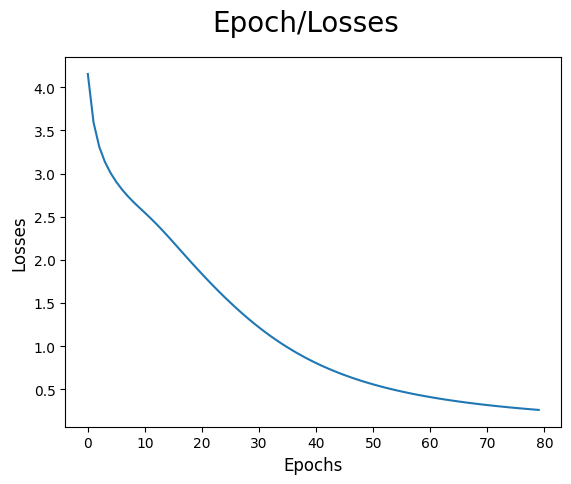

In [ ]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word
predict(['found', 'it', 'raced', 'to'])

'ram'

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0